In [ ]:
#Colab URL: https://colab.research.google.com/drive/1RpZ5QE05E90tnTDeunRzmxhmoMzbCIqU#scrollTo=A7gwfUYW5I3L

In [1]:
#import modules we need for EDA and wrangling
import pandas as pd # for data wrangling
import numpy as np # for numeric python functions
from pylab import * # for plotting
import seaborn as sns # for other cool plotting

# these functions are useful for splitting and normalization
from sklearn.preprocessing import MinMaxScaler # puts all data between 0/1
from sklearn.model_selection import train_test_split #splits data int test/train partitions

# import other functions we will need for regression modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# regression error metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Decision Tree Visualization
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OPIM 3511/Heart Disease.csv')

### EDA

In [ ]:
# data type, shape, and columns
print('This is the shape: \n', df.shape, '\n')
print('These are the column names: \n', df.columns, '\n')
print('These are the data types: \n', df.dtypes, '\n')
print('This is the head: \n', df.head())

This is the shape: 
 (1025, 14) 

These are the column names: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object') 

These are the data types: 
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object 

This is the head: 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138 

In [ ]:
# Since these data set has some categorical data, I am going to drop all columns contains categorical data
df.drop('cp', axis = 1, inplace = True)
df.drop('restecg', axis = 1, inplace = True)
df.drop('ca', axis = 1, inplace = True)
df.drop('thal', axis = 1, inplace = True)

In [ ]:
# check the df again and see if there are missing values
df.info() # no missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   thalach   1025 non-null   int64  
 6   exang     1025 non-null   int64  
 7   oldpeak   1025 non-null   float64
 8   slope     1025 non-null   int64  
 9   target    1025 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 80.2 KB


### Graph and plot

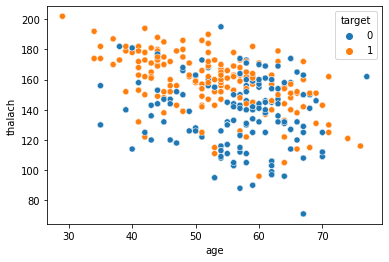

In [ ]:
sns.scatterplot(x = df['age'], y = df['thalach'], hue = df['target']) # thalach stands for maximum heart rate achieves. Target with value 0 = no disease, 1 = disease

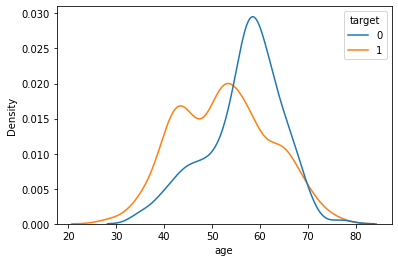

In [ ]:
sns.kdeplot(x = df['age'], hue = df['target']) # Age distribution in this dataset

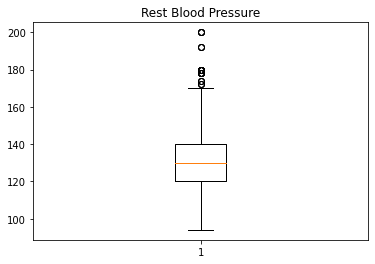

In [ ]:
boxplot(df['trestbps'])
title('Rest Blood Pressure')
show()

In [ ]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,1.385366,0.513171
std,9.072290,0.460373,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,0.617755,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,1.000000,1.000000
75%,61.000000,1.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


### Modeling

In [ ]:
# assign X and Y
X = df.drop('target', axis = 1) #Fbs and exang are presented as boolean variable
Y = df['target']
print(X.shape, Y.shape)

(1025, 9) (1025,)


In [ ]:
# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2775630)

In [ ]:
# convert these all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# fit the model
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)

In [ ]:
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)

### Evaluation

In [ ]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()

In [ ]:
# print out
print('TN:', tn)
print('FP', fp)
print('FN', fn)
print('TP', tp)

TN: 73
FP 24
FN 14
TP 94


In [ ]:
# classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        97
           1       0.80      0.87      0.83       108

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



### Decision tree model

In [ ]:
DTC = DecisionTreeClassifier(max_depth = 5)
DTC = DTC.fit(X_train, y_train)

In [ ]:
train_pred_DTC = DTC.predict(X_train)
test_pred_DTC = DTC.predict(X_test)

In [ ]:
tn_DTC, fp_DTC, fn_DTC, tp_DTC = confusion_matrix(y_test, test_pred_DTC).ravel()

In [ ]:
print('TN:', tn_DTC)
print('FP', fp_DTC)
print('FN', fn_DTC)
print('TP', tp_DTC)

TN: 77
FP 20
FN 10
TP 98


In [ ]:
print(classification_report(y_test, test_pred_DTC))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        97
           1       0.83      0.91      0.87       108

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



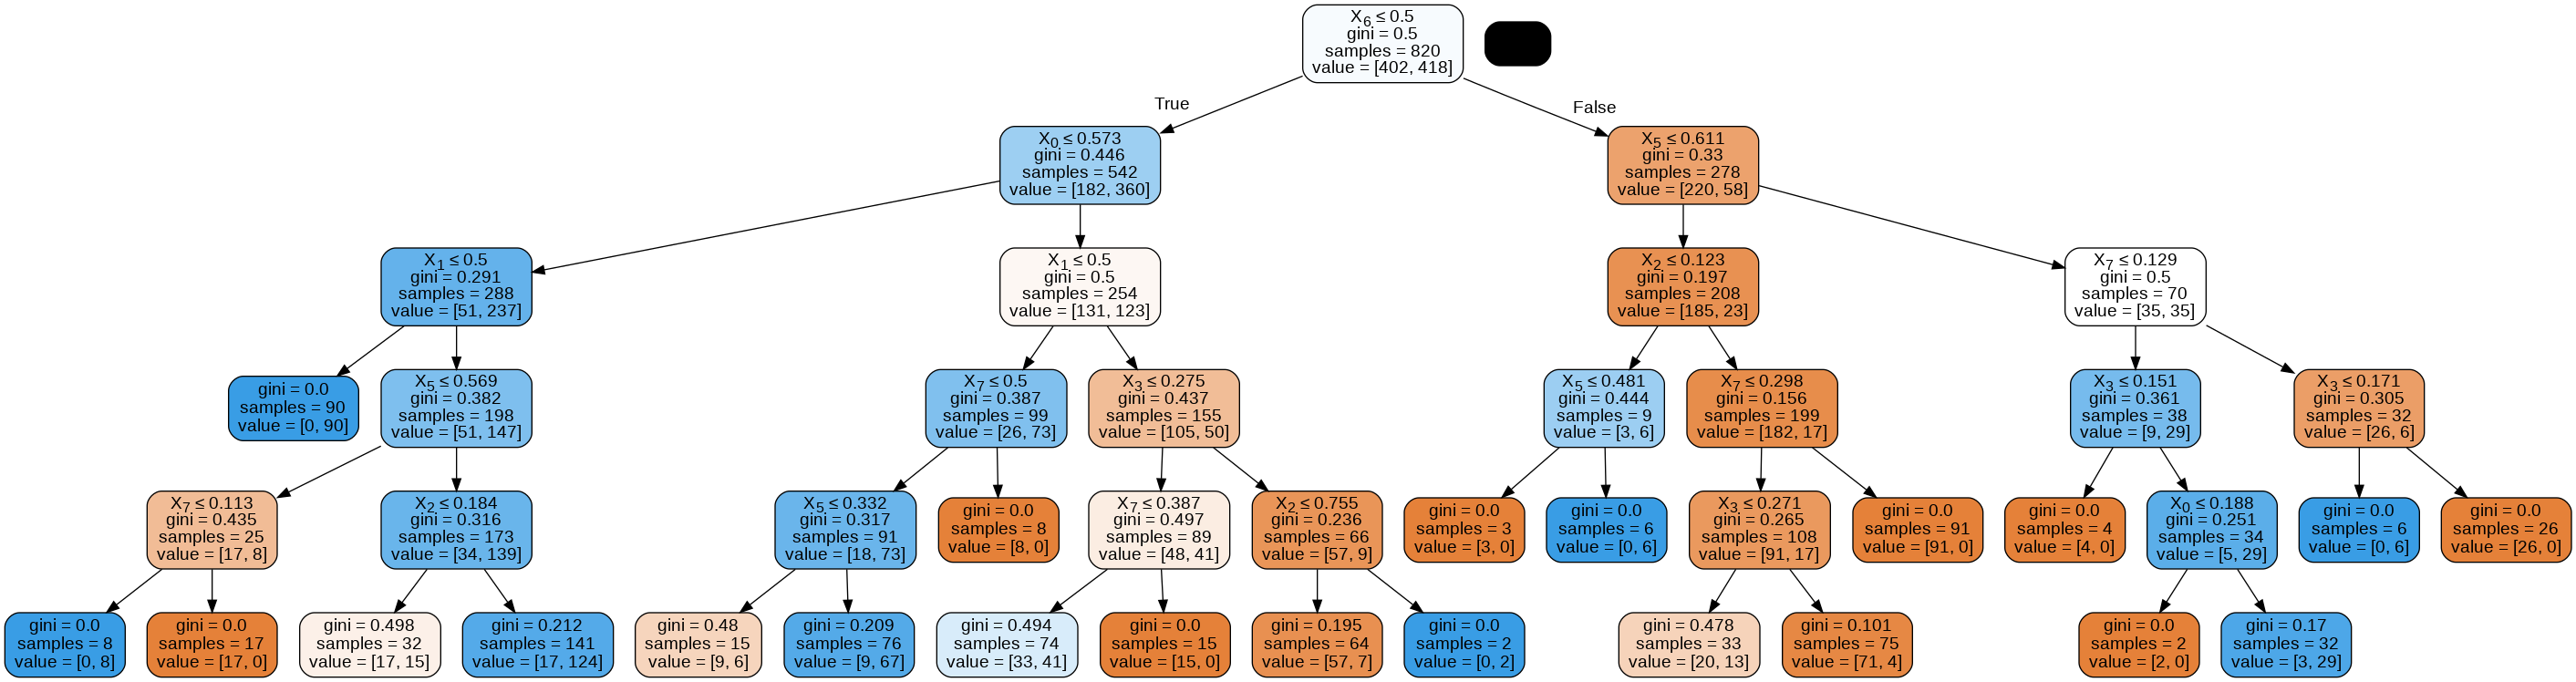

In [ ]:
dot_data = StringIO()
export_graphviz(DTC, out_file = dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())